<a href="https://colab.research.google.com/github/Darshini-A/Data-Storage-Management/blob/main/CIFAR10CNN%203%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPool2D, Activation

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


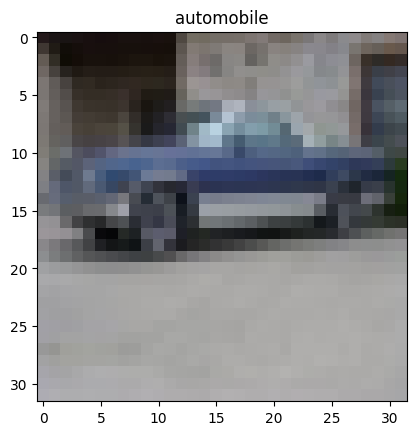

In [7]:
y_train = y_train.flatten()
y_test = y_test.flatten()
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
n=10000
plt.imshow(x_train[n])
plt.title(classes[y_train[n]])
plt.show()

In [8]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [9]:
x_train = x_train.reshape(50000, 32, 32, 3).astype("float")
x_test = x_test.reshape(10000, 32, 32, 3).astype("float")

In [10]:
model = Sequential()
model.add(Conv2D(filters = 4, kernel_size=(3,3), strides= (1,1), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(10, activation= "softmax"))
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics="accuracy")
model.fit(x=x_train, y=y_train_ohe, epochs=5, validation_data=(x_test, y_test_ohe), batch_size=1000)

Epoch 1/5
50/50 [==============================] - 4s 26ms/step - loss: 36.1913 - accuracy: 0.1311 - val_loss: 14.4765 - val_accuracy: 0.1435
Epoch 2/5
50/50 [==============================] - 1s 17ms/step - loss: 8.0820 - accuracy: 0.1363 - val_loss: 3.5576 - val_accuracy: 0.1452
Epoch 3/5
50/50 [==============================] - 1s 18ms/step - loss: 3.0345 - accuracy: 0.1364 - val_loss: 2.7264 - val_accuracy: 0.1355
Epoch 4/5
50/50 [==============================] - 1s 14ms/step - loss: 2.6414 - accuracy: 0.1339 - val_loss: 2.5532 - val_accuracy: 0.1304
Epoch 5/5
50/50 [==============================] - 1s 13ms/step - loss: 2.5156 - accuracy: 0.1333 - val_loss: 2.4761 - val_accuracy: 0.1260


In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (1000, 30, 30, 4)         112       
                                                                 
 max_pooling2d (MaxPooling2  (1000, 15, 15, 4)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (1000, 900)               0         
                                                                 
 dense (Dense)               (1000, 10)                9010      
                                                                 
Total params: 9122 (35.63 KB)
Trainable params: 9122 (35.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
